In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

EXPLORATORY DATA ANALYSIS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData/data.csv', sep = ";")

In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.isnull().sum()
data.duplicated().sum()

np.int64(0)

In [ ]:
X = data.drop('Target', axis=1)
y = data['Target']


In [ ]:
X.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object dtype)
categorical_cols = data.select_dtypes(include='object').columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    print(f"Encoded column '{col}'. Mapping: {list(le.classes_)} -> {list(range(len(le.classes_)))}")

# Display the head of the modified data to confirm the changes
print("\nData head after encoding categorical columns:")
display(data.head())

Encoded column 'Target'. Mapping: ['Dropout', 'Enrolled', 'Graduate'] -> [0, 1, 2]

Data head after encoding categorical columns:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
corrmatrix = data[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']].corr()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


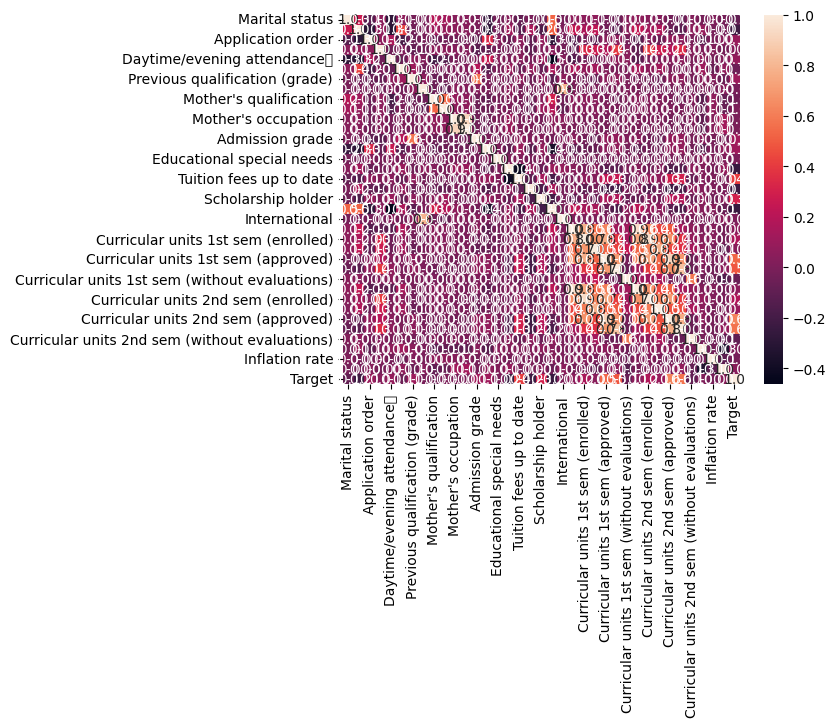

In [ ]:
sns.heatmap(corrmatrix, annot=True, fmt=".1f")
plt.show()

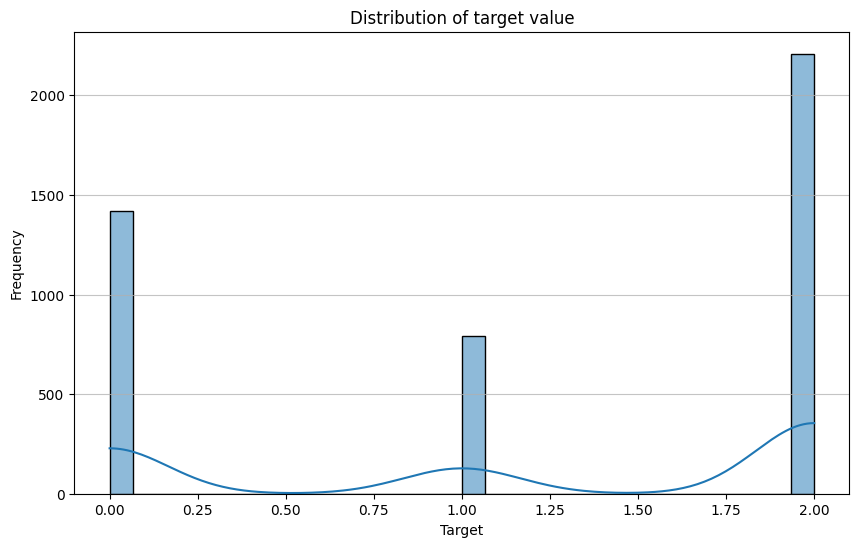

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Target'], kde=True, bins=30)
plt.title('Distribution of target value')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
data_num = data[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]

In [ ]:
data_num_scaled = sk.preprocessing.StandardScaler().fit(data_num)

In [ ]:
data_num_scaled_array = data_num_scaled.transform(data_num)
data_num_scaled_df = pd.DataFrame(data_num_scaled_array, columns=data_num.columns)
data_num_scaled_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


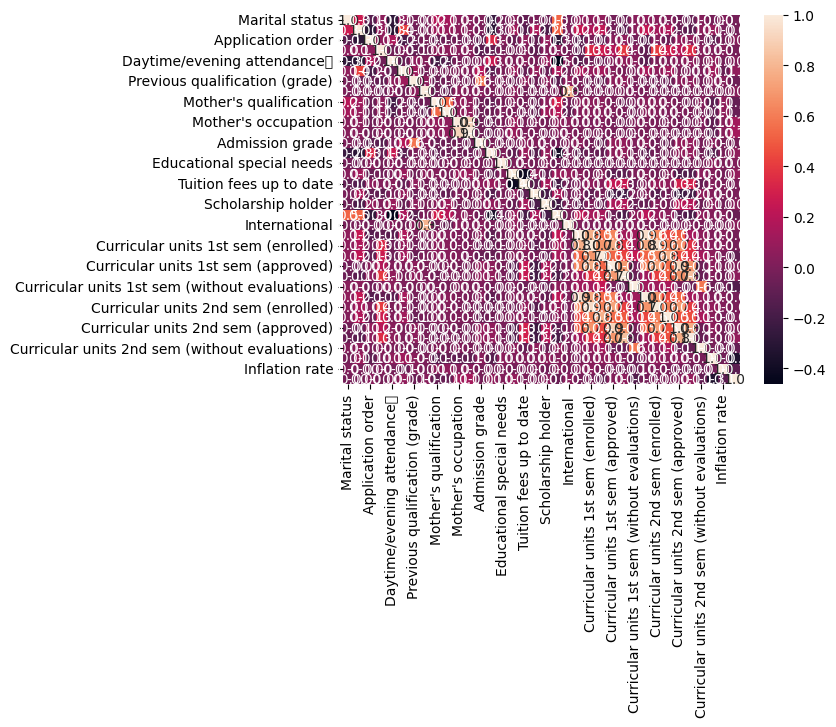

In [ ]:
corrmatrix2 = data_num_scaled_df.corr()
sns.heatmap(corrmatrix2, annot=True, fmt=".1f")
plt.show()

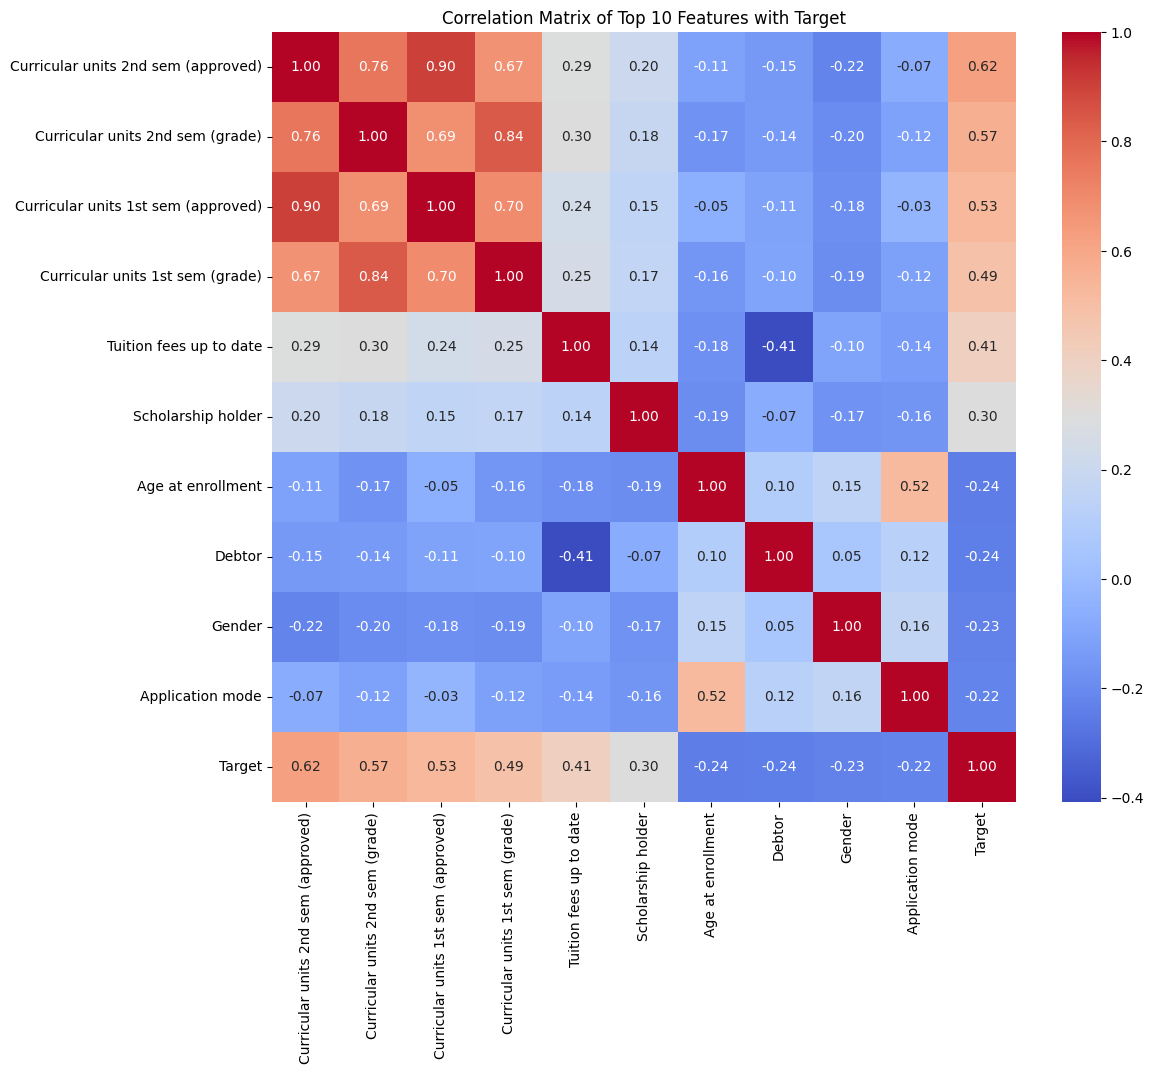

['Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Tuition fees up to date',
 'Scholarship holder',
 'Age at enrollment',
 'Debtor',
 'Gender',
 'Application mode',
 'Target']

In [ ]:
# Get correlations with 'Target' and sort by absolute value
target_correlations = corrmatrix['Target'].drop('Target')
top_correlated_features = target_correlations.abs().sort_values(ascending=False).head(10).index.tolist()

# Include 'Target' itself in the list of features for the heatmap
features_for_heatmap = top_correlated_features + ['Target']

# Create a sub-matrix with only the top correlated features and 'Target'
subset_corrmatrix = corrmatrix.loc[features_for_heatmap, features_for_heatmap]

# Plot the heatmap for the subset of correlated features
plt.figure(figsize=(12, 10))
sns.heatmap(subset_corrmatrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Top 10 Features with Target')
plt.show()
features_for_heatmap

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
#scaled, features extracted
# Define features (X) and target (y) using the top_correlated_features
X_dt = data_num_scaled_df[top_correlated_features]
y_dt = data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
decision_tree_model = RandomForestClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7344632768361582

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       316
           1       0.47      0.28      0.35       151
           2       0.74      0.92      0.82       418

    accuracy                           0.73       885
   macro avg       0.67      0.64      0.64       885
weighted avg       0.72      0.73      0.72       885



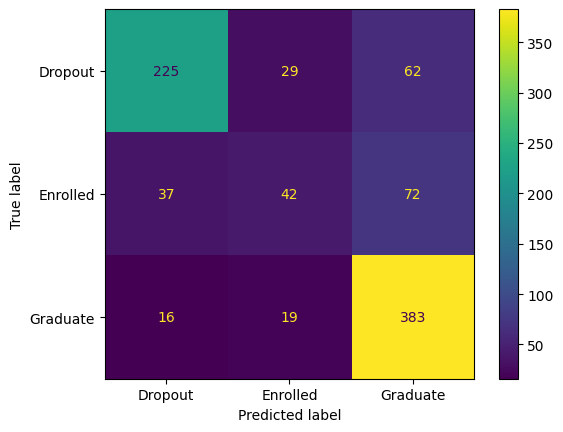

In [ ]:
cm = confusion_matrix(np.asarray(y_test), np.asarray(y_pred))
labels = ["Dropout","Enrolled", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, Y_train)

# Make predictions on the test set
Y_pred = random_forest_model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7604519774011299

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.49      0.30      0.37       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



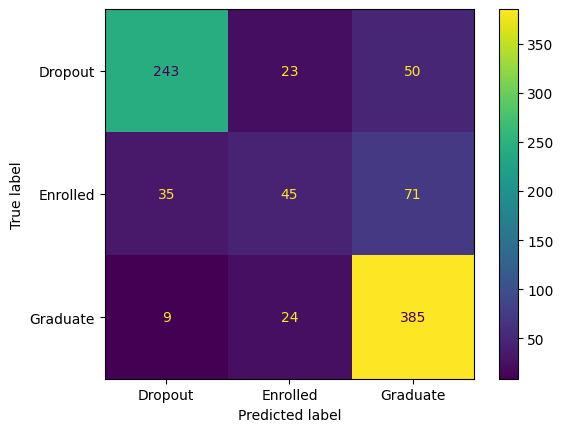

In [ ]:
cm = confusion_matrix(np.asarray(Y_test), np.asarray(Y_pred))
labels = ["Dropout","Enrolled", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

Accuracy: 0.9022038567493113

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       277
           2       0.90      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



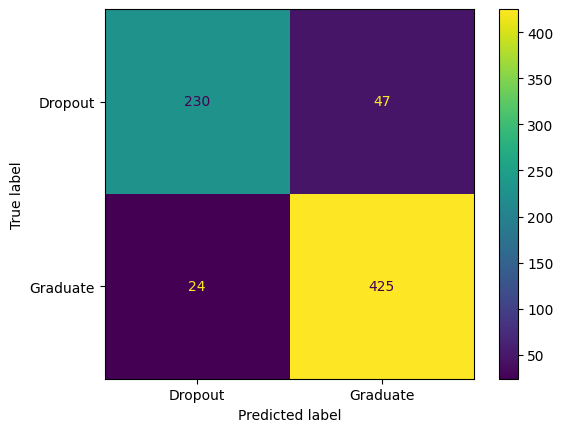

In [ ]:
data_filt = data[data['Target'] != 1]
X_filt = data_filt.drop('Target', axis = 1)
y_filt = data_filt['Target']

x_train, x_test, Y_train, Y_test = train_test_split(X_filt, y_filt, test_size=0.2, random_state=42)
decision_tree_model = RandomForestClassifier(random_state=42)
decision_tree_model.fit(x_train, Y_train)

# Make predictions on the test set
Y_pred = decision_tree_model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(np.asarray(Y_test), np.asarray(Y_pred))
labels = ["Dropout", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

In [ ]:


print(f"Original target distribution: {Counter(y_dt)}")

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_dt, y_dt)

print(f"Resampled target distribution: {Counter(y_resampled)}")


Original target distribution: Counter({2: 2209, 0: 1421, 1: 794})
Resampled target distribution: Counter({0: 794, 1: 794, 2: 794})


In [ ]:
data_final_scaled = pd.concat([data_num_scaled_df, data['Target']], axis=1)
print("Data with scaled features and Target column:")
display(data_final_scaled.head())

Data with scaled features and Target column:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


In [ ]:
# Drop records where 'Target' value is 1
data_filtered = data_final_scaled[data_final_scaled['Target'] != 1]
# Update X_dt and y_dt to reflect the filtered data, using the top_correlated_features
X_dt = data_filtered[top_correlated_features]
y_dt = data_filtered['Target']

print(f"Original data shape: {data.shape}")
print(f"Filtered data shape: {data_filtered.shape}")
print(f"New target distribution after dropping '1': {Counter(y_dt)}")

display(data_filtered.head())

print(f"Original target distribution: {Counter(y_dt)}")

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_dt, y_dt)

print(f"Resampled target distribution: {Counter(y_resampled)}")

Original data shape: (4424, 37)
Filtered data shape: (3630, 37)
New target distribution after dropping '1': Counter({2: 2209, 0: 1421})


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


Original target distribution: Counter({2: 2209, 0: 1421})
Resampled target distribution: Counter({0: 1421, 2: 1421})


Accuracy: 0.8611599297012302

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       287
           2       0.84      0.89      0.86       282

    accuracy                           0.86       569
   macro avg       0.86      0.86      0.86       569
weighted avg       0.86      0.86      0.86       569



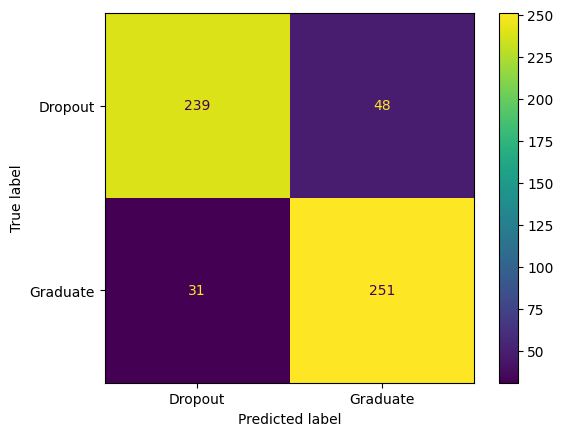

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
decision_tree_model = RandomForestClassifier(random_state=42)
decision_tree_model.fit(x_train, Y_train)

# Make predictions on the test set
Y_pred = decision_tree_model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(np.asarray(Y_test), np.asarray(Y_pred))
labels = ["Dropout", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

In [ ]:
print(f"Dataset of enrolled students")
data_enrolled = data[data['Target'] == 1]
data_enrolled_notarget = data_enrolled.drop('Target', axis=1)
display(data_enrolled_notarget.head())
data_enrolled_notarget.shape



Dataset of enrolled students


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
16,1,18,1,9238,1,1,137.0,1,19,38,...,0,0,6,14,2,11.000,0,10.8,1.4,1.74
19,1,1,1,9853,1,1,140.0,1,19,19,...,0,0,7,8,6,13.500,0,16.2,0.3,-0.92
21,1,18,4,9556,1,1,127.0,1,1,38,...,0,0,8,9,8,11.425,0,12.7,3.7,-1.70
25,1,1,1,9238,1,1,151.0,1,19,38,...,0,0,6,12,4,11.000,0,7.6,2.6,0.32
27,1,1,1,9085,1,1,138.0,1,19,19,...,2,0,5,7,4,13.000,0,9.4,-0.8,-3.12


(794, 36)

In [ ]:
print(f"Dataset of enrolled students")
data_grad= data[data['Target'] == 2]
data_grad_notarget = data_grad.drop('Target', axis=1)
display(data_grad_notarget.head())
data_grad_notarget.shape
data_grad_notarget.to_csv('data_grad.csv', index=False)
print("data_grad_notarget saved to 'data_grad.csv'")

Dataset of enrolled students


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06


data_grad_notarget saved to 'data_grad.csv'


In [ ]:
data_enrolled_notarget.to_csv('data_enrolled.csv', index=False)
print("data_enrolled_notarget saved to 'data_enrolled.csv'")

data_enrolled_notarget saved to 'data_enrolled.csv'


RANDOM FOREST CLASSIFIER

In [ ]:


# Split resampled data into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

parameters = {'max_depth': [12],
    'n_estimators': [71],
    'max_features': [2],
    'min_samples_leaf': [4]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_res, y_train_res)
print('Best hyperparameters are '+str(grid_search.best_params_))
print('Best score is: ' + str(grid_search.best_score_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=12, max_features=2, min_samples_leaf=4, n_estimators=71; total time=   0.2s
[CV] END max_depth=12, max_features=2, min_samples_leaf=4, n_estimators=71; total time=   0.2s
[CV] END max_depth=12, max_features=2, min_samples_leaf=4, n_estimators=71; total time=   0.2s
[CV] END max_depth=12, max_features=2, min_samples_leaf=4, n_estimators=71; total time=   0.2s
[CV] END max_depth=12, max_features=2, min_samples_leaf=4, n_estimators=71; total time=   0.2s
Best hyperparameters are {'max_depth': 12, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 71}
Best score is: 0.891871327675233


parameters = {'max_depth': [3,5,7,10],
    'n_estimators': [10, 25, 50, 75, 100],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]}

    Best hyperparameters are {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 4, 'n_estimators': 75}
Best score is: 0.8886924529215279

parameters = {'max_depth': [10,25,40,50],
    'n_estimators': [60, 70, 75, 80, 85],
    'max_features': [40, 50, 60, 70],
    'min_samples_leaf': [4, 5, 6]}

    Best hyperparameters are {'max_depth': 10, 'max_features': 60, 'min_samples_leaf': 4, 'n_estimators': 70}
Best score is: 0.8886934211163287

parameters = {'max_depth': [9,10,12,15],
    'n_estimators': [68,69, 70, 71, 72],
    'max_features': [53, 57, 60, 62],
    'min_samples_leaf': [4]}
        
    Best hyperparameters are {'max_depth': 12, 'max_features': 62, 'min_samples_leaf': 4, 'n_estimators': 71}
Best score is: 0.8891300769714867

parameters = {'max_depth': [11,12,13],
    'n_estimators': [71, 73, 74],
    'max_features': [61, 62, 63, 64, 65, 66],
    'min_samples_leaf': [4]}
        
    Best hyperparameters are {'max_depth': 12, 'max_features': 61, 'min_samples_leaf': 4, 'n_estimators': 71}
Best score is: 0.8904545674589727

In [ ]:
print('Best hyperparameters are '+str(grid_search.best_params_))
print('Best score is: ' + str(grid_search.best_score_))

Best hyperparameters are {'max_depth': 12, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 71}
Best score is: 0.891871327675233


In [ ]:
# Initialize and train the Decision Tree Classifier with resampled data
decision_tree_model_resampled = RandomForestClassifier(random_state=42, max_depth=12, max_features=2, min_samples_leaf=4, n_estimators=71)
decision_tree_model_resampled.fit(X_train_res, y_train_res)

# Make predictions on the test set from resampled data
y_pred_res = decision_tree_model_resampled.predict(X_test_res)

# Evaluate the model with resampled data
print(("Accuracy (resampled data):"), accuracy_score(y_test_res, y_pred_res))
print("\nClassification Report (resampled data):\n", classification_report(y_test_res, y_pred_res))

Accuracy (resampled data): 0.8953168044077136

Classification Report (resampled data):
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       277
           2       0.89      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726



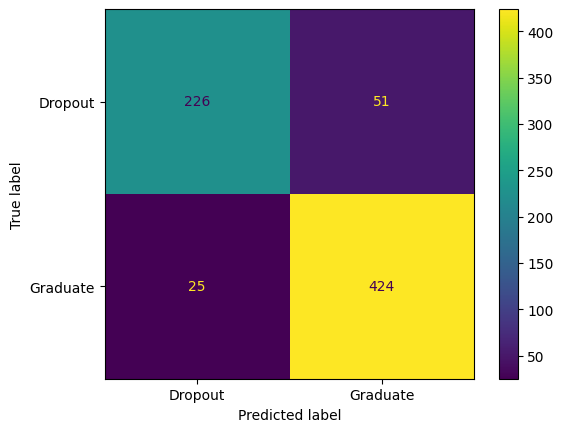

In [ ]:
cm = confusion_matrix(np.asarray(y_test_res), np.asarray(y_pred_res))
labels = ["Dropout", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

LOGISTIC REGRESSION

In [ ]:
import pandas as pd

# Reset indices of both X_train_res and y_train_res to ensure proper concatenation
X_train_res_reset = X_train_res.reset_index(drop=True)
y_train_res_reset = y_train_res.reset_index(drop=True)

# Concatenate X_train_res and y_train_res
train_data_combined = pd.concat([X_train_res_reset, y_train_res_reset], axis=1)

print("Combined Training Data Head:")
display(train_data_combined.head())

Combined Training Data Head:


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Age at enrollment,Debtor,Gender,Application mode,Target
0,-1.471527,-1.963489,-1.521257,-2.197102,-2.716392,-0.574914,-0.562168,-0.358167,-0.736572,-1.010660,0
1,-1.471527,-1.963489,-1.521257,-2.197102,0.368135,-0.574914,0.096858,-0.358167,1.357640,1.162916,0
2,1.182381,0.901074,0.741268,0.523401,0.368135,-0.574914,-0.693973,-0.358167,1.357640,-1.010660,2
3,0.187165,0.800311,0.094832,0.858782,0.368135,-0.574914,3.128376,-0.358167,-0.736572,1.162916,2
4,-1.471527,-1.963489,-1.521257,-2.197102,0.368135,-0.574914,0.360468,2.791994,1.357640,1.162916,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve

clf = [
    LogisticRegression(solver='newton-cg',penalty=None,max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty=None,max_iter=1000),
    LogisticRegression(solver='sag',penalty=None,max_iter=1000),
    LogisticRegression(solver='saga',penalty=None,max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
    # Train model on resampled training data
    alg.fit(X_train_res, y_train_res)

    # Make predictions on resampled test data
    predicted = alg.predict(X_test_res)

    # Evaluate using resampled test data and specify pos_label=2 for binary classification
    # Assuming class 2 ('Graduate') is the positive class for AUC, Precision, and Recall
    fp, tp, th = roc_curve(y_test_res, predicted, pos_label=2)

    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_res, y_train_res), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_res, y_test_res), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test_res, predicted, pos_label=2),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test_res, predicted, pos_label=2),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1

clf_compare.sort_values(by = ['Test Accuracy'], ascending = True, inplace = True)
clf_compare

,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,0.88567,0.88843,0.88174,0.94655,0.87039
1,0.88567,0.88843,0.88174,0.94655,0.87039
2,0.88567,0.88843,0.88174,0.94655,0.87039
3,0.88567,0.88843,0.88174,0.94655,0.87039


In [ ]:
logistic = LogisticRegression(solver='newton-cg',penalty=None,max_iter=1000)
logistic.fit(X_train_res, y_train_res)

# Make predictions on the test set from resampled data
y_pred_res = logistic.predict(X_test_res)

# Evaluate the model with resampled data
print(("Accuracy (resampled data):"), accuracy_score(y_test_res, y_pred_res))
print("\nClassification Report (resampled data):\n", classification_report(y_test_res, y_pred_res))

Accuracy (resampled data): 0.8884297520661157

Classification Report (resampled data):
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       277
           2       0.88      0.95      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



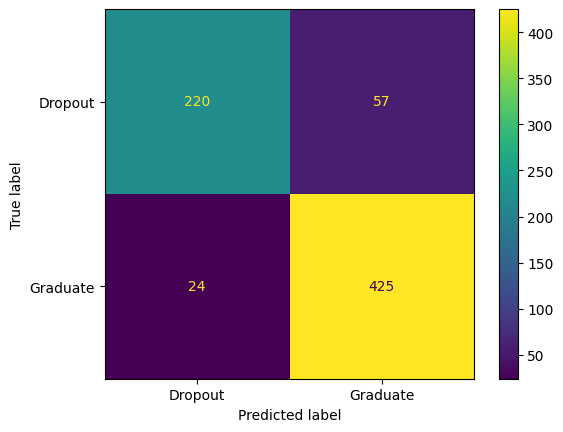

In [ ]:
cm = confusion_matrix(np.asarray(y_test_res), np.asarray(y_pred_res))
labels = ["Dropout", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.065, 0.068, 0.07, 0.072, 0.075],
    'n_estimators': [210, 212, 215, 217, 220],
    'max_features': [2]}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.4s
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.4s
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.4s
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.4s
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.4s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.4s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.4s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.4s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.6s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.6s
[CV] END learning_rate=0.065, max_features=2, n_estimators=215; total time=   0.6s
[CV] END learning_rate=0.

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.065, 0.068, 0.07, 0.072, 0.075],
                         'max_features': [2],
                         'n_estimators': [210, 212, 215, 217, 220]},
             scoring='accuracy', verbose=2)

In [ ]:
print('Best hyperparameters are '+str(grid_search.best_params_))
print('Best score is: ' + str(grid_search.best_score_))

Best hyperparameters are {'learning_rate': 0.068, 'max_features': 2, 'n_estimators': 217}
Best score is: 0.8991038043800819


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=210,
                                 learning_rate=0.065,
                                 random_state=42,
                                 max_features=2)

gbc.fit(X_train_res, y_train_res)

pred_y = gbc.predict(X_test_res)

acc = accuracy_score(y_test_res, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.89


In [ ]:
y_pred_res = gbc.predict(X_test_res)

# Evaluate the model with resampled data
print(("Accuracy (resampled data):"), accuracy_score(y_test_res, y_pred_res))
print("\nClassification Report (resampled data):\n", classification_report(y_test_res, y_pred_res))

Accuracy (resampled data): 0.8939393939393939

Classification Report (resampled data):
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       277
           2       0.89      0.94      0.92       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.89       726
weighted avg       0.89      0.89      0.89       726



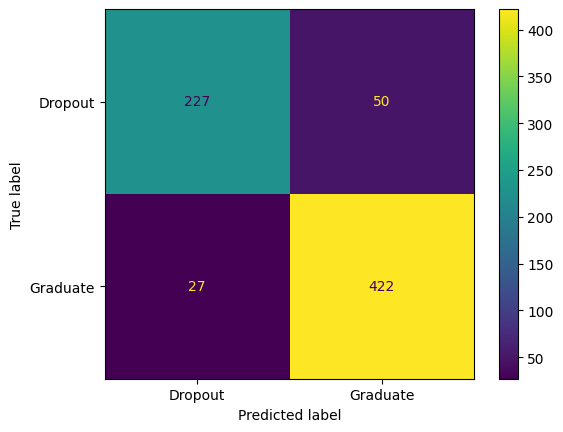

In [ ]:
cm = confusion_matrix(np.asarray(y_test_res), np.asarray(y_pred_res))
labels = ["Dropout", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()